## Final Project Submission

Please fill out:
* Student name: Ayda Woldegerima
* Student pace: Flex
* Scheduled project review date/time:November 17/2022
* Instructor name:Joe Comeaux 
* Blog post URL:


#       Project Overview
For this project, I will use exploratory data analysis to generate insights for a business stakeholder.


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


#        Strategies to approach in solving the business problem
Inorder to explore what type of movies are currently doing best in the box office we need to gather various information inregards to the movies released in box office. The measures that I will be using to assess if a movie is considered to be doing good are movie ratings, gross money return and Genres. Upon the exploration of those Criteria I will use the information to make logistic suggestion to what type of films Microsoft should create.

# Importing, Exploring and Cleaning Data
Steps followed to succesfully explore and utilize data
* Import the necessary CSV and SQL data
* Explore data
* Fill missing data
* Update columns in SQL data
* Utilize updated Data to answer question


In [34]:
#import necessary python library 
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# connect Zipped SQLite database
# Contains movie ratings and Genres
conn = sqlite3.connect("im.db")
conn

In [4]:
# open Compressed CSV file
# Contains gross money return
money = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')

In [5]:
#explore csv data
print(money.shape)
print(money.dtypes)
money.head(5)

(3387, 5)
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The SQL database contains large number of tables but I will be focused on movie_basics and movie_ratings to explore for this project

In [6]:
#Explore contents of Zipped SQLite database from movie_basics table
pd.read_sql("SELECT * from movie_basics;",conn).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
#Explore contents of Zipped SQLite database from movie_ratings table
pd.read_sql("SELECT * from movie_ratings;",conn).head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


# Data cleaning and Questions to address 
Now that I have accessed the intended data I start with data cleaning by exploring if there is any missing data. At the same time explore which column you want to keep for each table. Once I have cleaned the data, I postulated questions to explore inorder to solve the business problem 

* Questions to Explore:
1. What is the Gross profit Margin for movies?
2. Which Genre of movies should one produce?
3. Who is the best director/producer to hire for production of movie?

# Question 1: What is the Gross Profit Margin for movies?

In [239]:
#What is the highest gross profit obtained for movies?
#Fill NaN values with 0 and find total gross
money["foreign_gross"]=money["foreign_gross"].fillna(0)
money["foreign_gross"] = pd.to_numeric(money["foreign_gross"], errors='coerce')
money['Total_gross'] = money['domestic_gross'] + money['foreign_gross']
money.sort_values('Total_gross', ascending= False).head(5)

,title,studio,domestic_gross,foreign_gross,year,Total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


<function matplotlib.pyplot.show(close=None, block=None)>

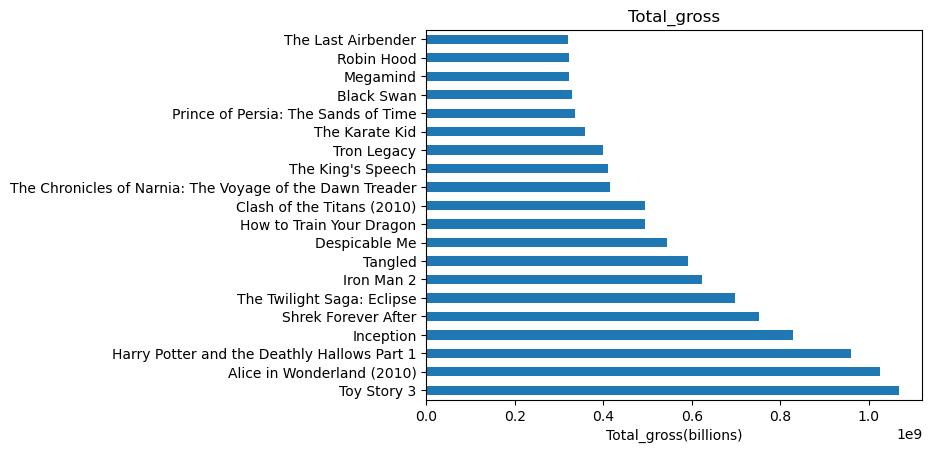

In [174]:
#bar graph to see highest gross profit
money.head(20).plot.barh("title","Total_gross")
plt.title("Total_gross")
plt.xlabel("Total_gross(billions)")
plt.ylabel("")
plt.legend().remove()
plt.show
#plt.savefig("/users/aydabwg/Desktop/new_fig")

After Analyzing the Gross profit margin of movies, I furter wanted to under what factor either domestic profit or foreign profit played the most role in the total gross profit.

<function matplotlib.pyplot.show(close=None, block=None)>

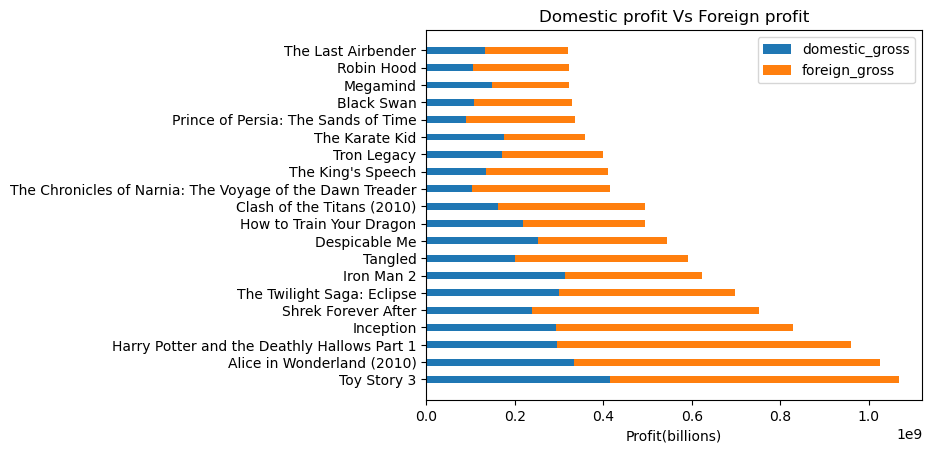

In [91]:
first = money.head(20)
w = 0.4
x = first["title"]
domestic = first["domestic_gross"]
foreign = first["foreign_gross"]

plt.barh(x,domestic,w, label = "domestic_gross")
plt.barh(x,foreign,w,left=domestic, label="foreign_gross")
plt.title("Domestic profit Vs Foreign profit")
plt.xlabel("Profit(billions)")
plt.ylabel("")
plt.legend()
plt.show

Upon the analysis for the Profit Gross Margin for movies, I went deeper to understand which factors either domestic profit or foreign profit played a huge role in the overall all Gross profit of movies. The analysis suggests that Foreign profits play a huge role and contribute in higher amount to the overall Gross profit of movies. So based on this analysis I would suggest that Microsoft produces movies that could be distributed to foreign countries to gain more profit, it could be production of movies that have acceptability world wide. In marketig Strategy set a budget that could be used to advertise the movie worldwide.

# Question 2: Which Genre of movies should one produce?

In [9]:
#Which Genres has the most movies produced?
pd.read_sql
genress=("""SELECT count(movie_id), genres, start_year 
from movie_basics 
Group by genres 
order by count(movie_id) DESC ;""")
pd.read_sql(genress,conn).head(2)

,count(movie_id),genres,start_year
0,32185,Documentary,2013
1,21486,Drama,2018


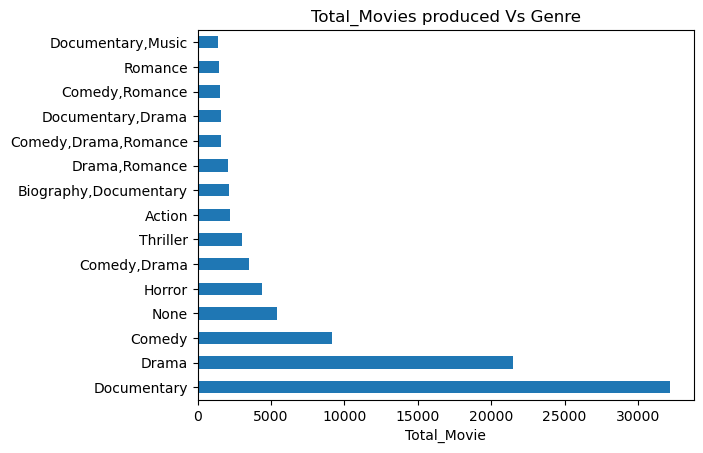

In [193]:
#Which Genres has the most movies produced?
#Visualization
pd.read_sql
genress=("""SELECT count(movie_id), genres, start_year 
from movie_basics 
Group by genres 
order by count(movie_id) DESC;""")
pd.read_sql(genress,conn).head(15).plot.barh(x= "genres", y="count(movie_id)")
plt.title("Total_Movies produced Vs Genre")
plt.ylabel("")
plt.xlabel("Total_Movie")
plt.legend().remove()
#plt.savefig("/users/aydabwg/Desktop/new_fig_1")

As per the data collected it indicates that movies that have been produced so far are distributed across genres but they are majorly concentrated in the Documentary genre followed by Drama genre. upon this finding lets dive further and assess which genre has the highest rating and assess the movie time length

In [156]:
pd.read_sql("""
select movie_id,averagerating,genres,runtime_minutes
from movie_ratings
join movie_basics
using (movie_id)
group by genres 
order by averagerating DESC;""",conn).head(2)

,movie_id,averagerating,genres,runtime_minutes
0,tt10146728,9.7,"Comedy,Documentary,Sport",NaN
1,tt1791606,9.4,"Documentary,Drama,War",93.0


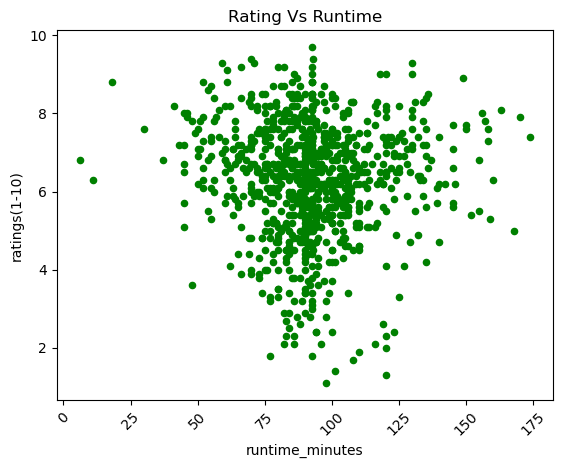

In [212]:
#Does movie genres and movie rating have correlation?
pd.read_sql("""
select movie_id,averagerating,genres,coalesce(runtime_minutes, 
AVG(runtime_minutes)over ())as runtime_minutes
from movie_ratings
join movie_basics
using (movie_id)
group by genres 
order by averagerating DESC;""",conn).plot.scatter(x="runtime_minutes", y="averagerating",color="green")
plt.title("Rating Vs Runtime")
plt.ylabel("ratings(1-10)")
plt.xlabel("runtime_minutes")
plt.xticks(rotation = 45)
plt.show()

From the above graph it is clear to see that majority of movies that had a higher average rating had a show time of between 75 - 100 minutes. upon this finding let us explore which movie genre has a show time between 75 - 100, which had the highest ratings.

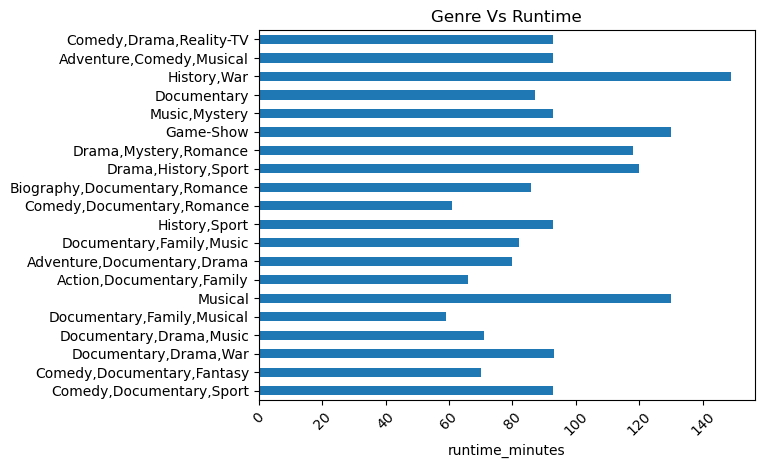

In [172]:
pd.read_sql("""
select movie_id,averagerating,genres,coalesce(runtime_minutes, 
AVG(runtime_minutes)over ())as runtime_minutes
from movie_ratings
join movie_basics
using (movie_id)
group by genres 
order by  averagerating DESC;""",conn).head(20).plot.barh(x="genres", y="runtime_minutes")
plt.title("Genre Vs Runtime")
plt.ylabel("")
plt.xlabel("runtime_minutes")
plt.xticks(rotation = 45)
plt.legend().remove()
plt.show()

To answer the question of which Genre should microsoft produce as a new production company, if the company is mostly focused on Achieving high ratings then the company should focus on producing movies that lie under the Documentary Genre. This genre as it can be seen above has the highest movie production, it has the highest ratings and the run time is in the preferred time framewhich resultrd in high rating. 

# Question 3: Who is the best director/producer to hire for production of movie?

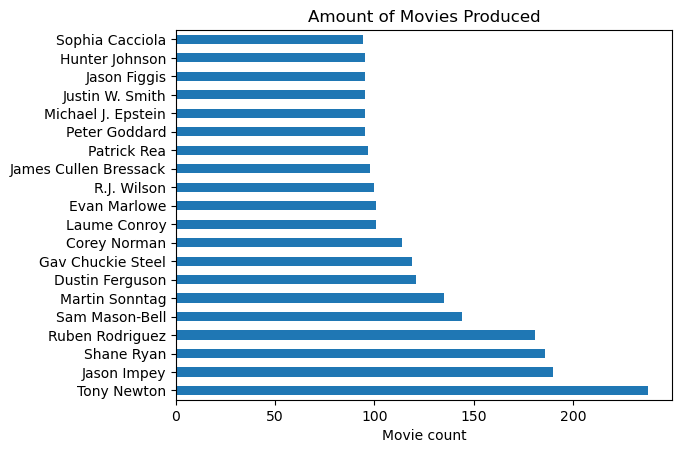

In [207]:
pd.read_sql("""select count(movie_id) ,primary_name,primary_profession 
from directors join persons using (person_id) 
group by primary_name 
order by count(movie_id) DESC;""",conn).head(20).plot.barh(x="primary_name", y="count(movie_id)")
plt.title("Amount of Movies Produced")
plt.ylabel("")
plt.xlabel("Movie count")
#plt.xticks(rotation = 45)
plt.legend().remove()
plt.show()

The above analysis shows the number of movies certain directors/producers have produced over time. The data suggests that director/producer Tony Newton has produced over 200 movies and the production of large number of movies could be an indication the persons skill and talent. To further support this finding lets see the profits that each producer/directors have generated for the movies they produced.

# Question 4: Does Genres and gross of profit have any correlation?

In [13]:
#Create a new table to add gross pay to sql database
cursor = conn.cursor()
cursor.execute(""" CREATE TABLE profits
                (title text, 
                 studio text, 
                 domestic_gross integer,
                 foreign_gross integer,
                 total_gross integer)""")

OperationalError: table profits already exists

In [14]:
#add gross pay to sql database
for row in money.itertuples():
    cursor.execute('''
                INSERT INTO profits (title,studio,domestic_gross,foreign_gross,total_gross)
                VALUES (?,?,?,?,?)
                ''',
                (row.title, 
                row.studio,
                row.domestic_gross,
                row.foreign_gross,
                row.Total_gross
                ))
conn.commit()

In [15]:
#Check if the table was added properly
pd.read_sql("select * from profits;",conn).head(5)

,title,studio,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,7.526000e+08


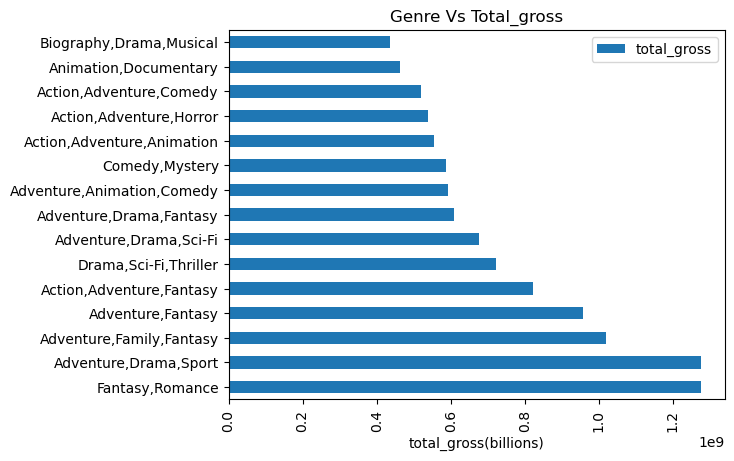

In [155]:
#Does Genres and gross of profit have any correlation?
#join total_gross and genre and plot data to visualize Correlation 
pd.read_sql("""
select ,total_gross
from movie_basics
join profits
    ON movie_basics.primary_title = profits.title
group by genres
order by total_gross DESC
;""",conn).head(15).plot.barh(x="genres", y="total_gross")
plt.title("Genre Vs Total_gross")
plt.ylabel("")
plt.xlabel("total_gross(billions)")
plt.xticks(rotation = 90)
#plt.savefig("/users/aydabwg/Desktop/new_fig_3")

Answer: In comparing gross benefit and Genre the data indicates that romance/fantasy genre earned the most. Along the line Adventure,Drama and Documentary are in the top section compared to othe Genre.

# Question 5: What is the rating of each Genres with high gross profit?

In [245]:
pd.read_sql("""
select *
from movie_basics
join profits
    ON movie_basics.primary_title = profits.title
join persons
    ON 
;""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,total_gross
0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09
1,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09
2,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09
3,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000.0,1.347000e+09
4,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000.0,1.347000e+09
...,...,...,...,...,...,...,...,...,...,...,...
10093,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",The Fate of the Furious,Uni.,226000000.0,NaN,NaN
10094,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",The Fate of the Furious,Uni.,226000000.0,NaN,NaN
10095,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",The Fate of the Furious,Uni.,226000000.0,NaN,NaN
10096,tt6108090,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",Secret Superstar,None,NaN,122000000.0,NaN


<AxesSubplot:xlabel='count(movie_id)', ylabel='total_gross'>

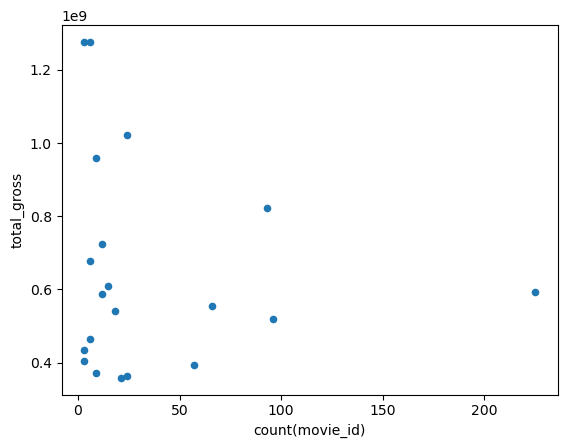

In [269]:
pd.read_sql("""
select count(movie_id),coalesce(total_gross,AVG(total_gross)over ()) as total_gross
from movie_basics
join profits
    ON movie_basics.primary_title = profits.title
group by genres
order by "total_gross" DESC;""",conn).head(20).plot.(x="count(movie_id)", y ="total_gross")

# Conclusion

As per the data exploring done above, We were able to observe what reasonable measure to account for in determining a succesful movie is. we looked into most produced genre, we observed the gross profit of movies and we were able to distinguish movies with highes ratings. We were able to determine what genre made the most profit and what genre had the most positive rating. From all the observations made, I have suggested that Microsoft's new movie studio focuses on genre that is making the most profit. By choosing this Microsoft's new movie studio would be able to set thier budget, target thier audience and estimate how much profit they could obtain.In putting forward this suggestion, it is important to keep in mind that there are still other factors that could play a role in what makes a movie successful. Although there might be other factors involved, the data analysis I have done above could be a stepping stone in guiding Microsoft's new movie studio to the right path in choosing what movie to make.